# Importing and preparing the data

In [1]:
import pandas as pd

# Import data
data = pd.read_csv('gamma2.csv')

# Dimensions of dataset
n = data.shape[0]
p = data.shape[1]

# Make data a numpy array
data = data.values

In [2]:
import matplotlib.pyplot as pyplot

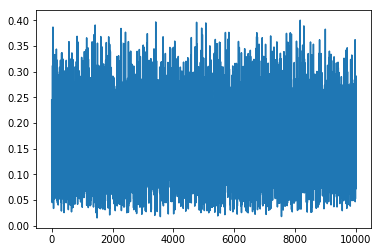

In [3]:
pyplot.plot(data[:, p-1])

# Preparing training and test data

In [4]:
import numpy as np

# Training and test data
train_start = 0
train_end = int(np.floor(0.7*n))
valid_start = train_end
valid_end = int(np.floor(0.8*n))
test_start = valid_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_valid = data[np.arange(valid_start, valid_end), :]
data_test = data[np.arange(test_start, test_end), :]

In [5]:
# Build X(t) and Y(x)
X_train = data_train[:, 0:p-1]
y_train = data_train[:, p-1]
X_valid = data_valid[:, 0:p-1]
y_valid = data_valid[:, p-1]
X_test = data_test[:, 0:p-1]
y_test = data_test[:, p-1]

X_train = X_train.reshape(-1,X_train.shape[1])
y_train = y_train.reshape(-1,1)
X_valid = X_valid.reshape(-1,X_valid.shape[1])
y_valid = y_valid.reshape(-1,1)
X_test = X_test.reshape(-1,X_test.shape[1])
y_test = y_test.reshape(-1,1)

# Placeholders

In [6]:
import tensorflow as tf

input_dim = X_train.shape[1]

# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, input_dim])
Y = tf.placeholder(dtype=tf.float32, shape=[None, y_train.shape[1]])

d:\program files\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Initializers

In [7]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)  #[-sqrt(3 * scale / n), sqrt(3 * scale / n)]
bias_initializer = tf.zeros_initializer()

# Layers

## Parameters

In [8]:
# Model architecture parameters
n_neurons_1 = 128
n_neurons_2 = 64
n_neurons_3 = 32
n_neurons_4 = 16
n_neurons_5 = 8

n_target = 1
# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([input_dim, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))
# Layer 5: Variables for hidden weights and biases
W_hidden_5 = tf.Variable(weight_initializer([n_neurons_4, n_neurons_5]))
bias_hidden_5 = tf.Variable(bias_initializer([n_neurons_5]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_5, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

## Designing the network architecture

In [9]:
# Hidden layer
hidden_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.sigmoid(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.sigmoid(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.sigmoid(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))
hidden_5 = tf.nn.sigmoid(tf.add(tf.matmul(hidden_4, W_hidden_5), bias_hidden_5))

# Output layer
out = tf.add(tf.matmul(hidden_5, W_out), bias_out)

# Loss Function

In [10]:
# Use mean square percentage error as the loss function
mspe = tf.reduce_mean(tf.squared_difference(out/Y, 1))

# Optimizer

In [11]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mspe)

# Training

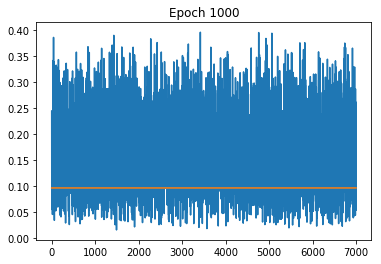

Training MSPE: 0.2989741
Max validation percentage error: 4.320631206054364


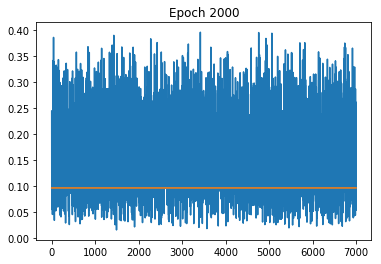

Training MSPE: 0.2989686
Max validation percentage error: 4.32063202927682


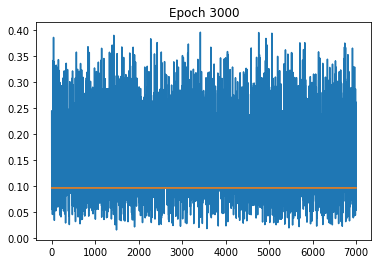

Training MSPE: 0.29895857
Max validation percentage error: 4.320539005139337


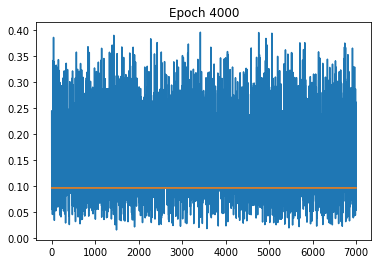

Training MSPE: 0.29894093
Max validation percentage error: 4.320335257581577


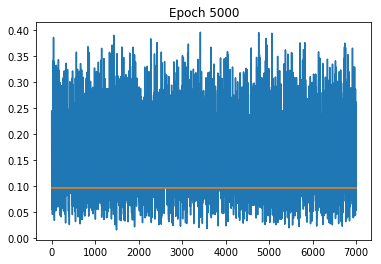

Training MSPE: 0.2989025
Max validation percentage error: 4.319896891623973


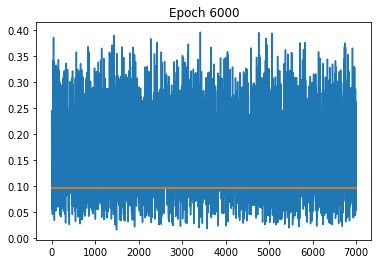

Training MSPE: 0.29867363
Max validation percentage error: 4.317153502790701


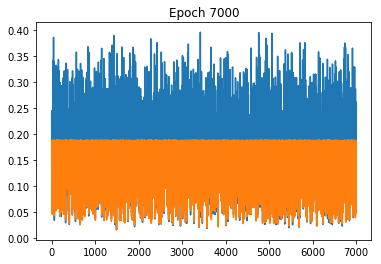

Training MSPE: 0.04062972
Max validation percentage error: 1.772747409161319


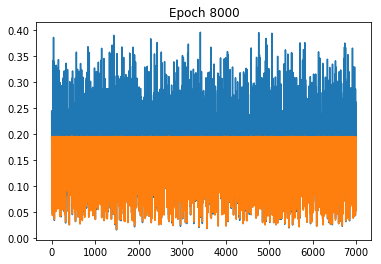

Training MSPE: 0.034583684
Max validation percentage error: 1.8727054053709535


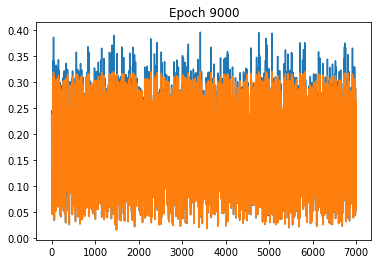

Training MSPE: 0.00051379355
Max validation percentage error: 0.18203606260056215


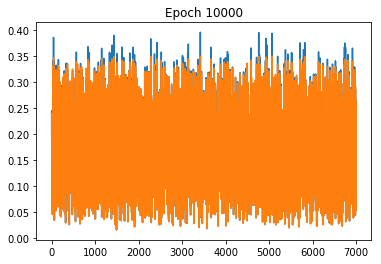

Training MSPE: 0.00013847451
Max validation percentage error: 0.138164667333603


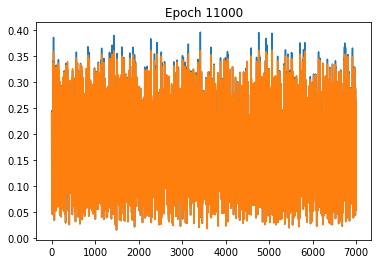

Training MSPE: 7.258739e-05
Max validation percentage error: 0.09823283309187869


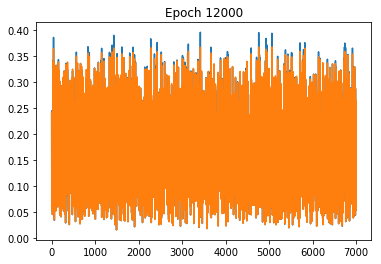

Training MSPE: 4.71203e-05
Max validation percentage error: 0.07205368579800009


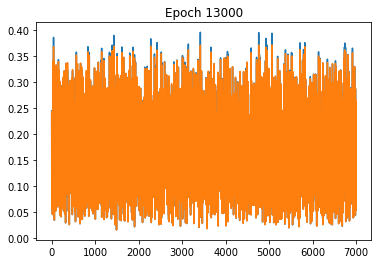

Training MSPE: 3.1239302e-05
Max validation percentage error: 0.05850672607353258


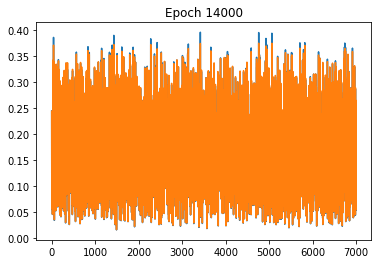

Training MSPE: 8.5135034e-05
Max validation percentage error: 0.05755959404428568


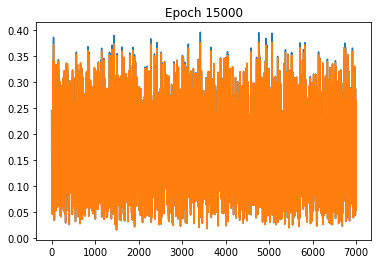

Training MSPE: 1.7948996e-05
Max validation percentage error: 0.05232275966005173


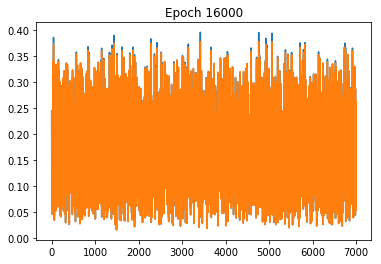

Training MSPE: 1.4719263e-05
Max validation percentage error: 0.049690653199105705


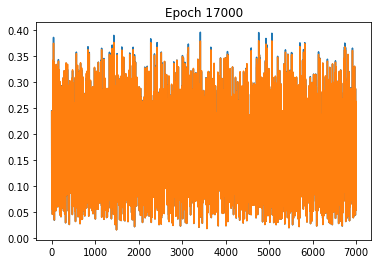

Training MSPE: 1.2111981e-05
Max validation percentage error: 0.04793043372599093


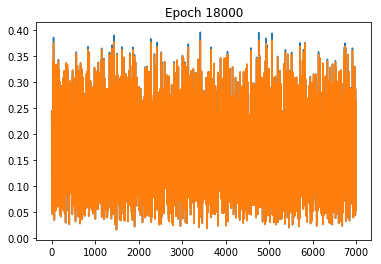

Training MSPE: 1.0276606e-05
Max validation percentage error: 0.046090007999938676


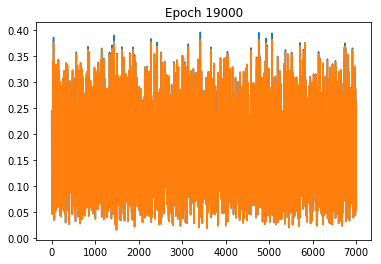

Training MSPE: 8.811306e-06
Max validation percentage error: 0.04435450271014596


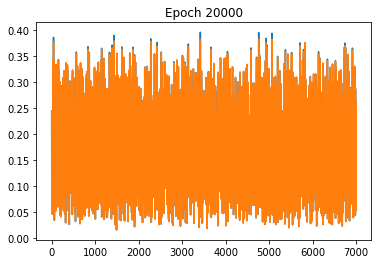

Training MSPE: 8.051217e-06
Max validation percentage error: 0.042890394065459025


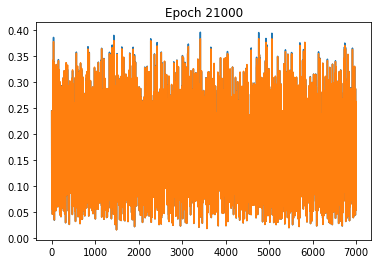

Training MSPE: 6.9645175e-06
Max validation percentage error: 0.04134828415073333


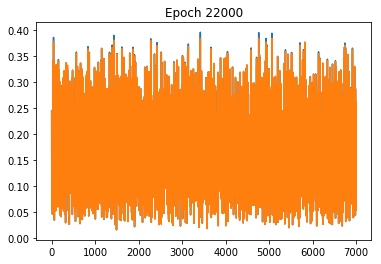

Training MSPE: 6.2846752e-06
Max validation percentage error: 0.039939208204224474


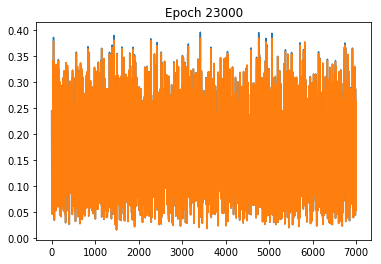

Training MSPE: 5.905038e-06
Max validation percentage error: 0.03873657378159945


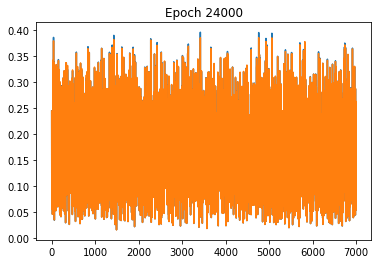

Training MSPE: 5.4362795e-06
Max validation percentage error: 0.03750858205564045


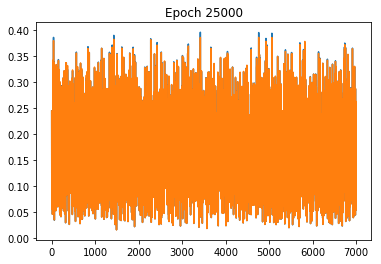

Training MSPE: 5.0875656e-06
Max validation percentage error: 0.036310173850237826


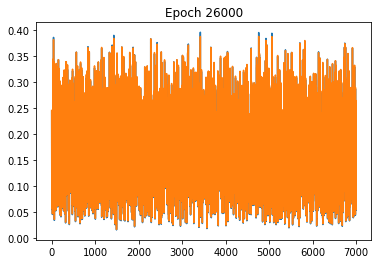

Training MSPE: 0.00018860248
Max validation percentage error: 0.06572403367493806


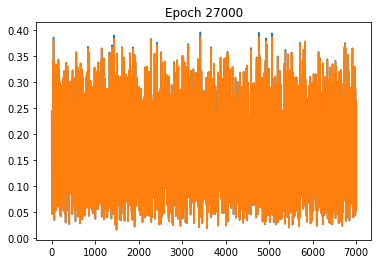

Training MSPE: 4.448005e-06
Max validation percentage error: 0.033760294876552965


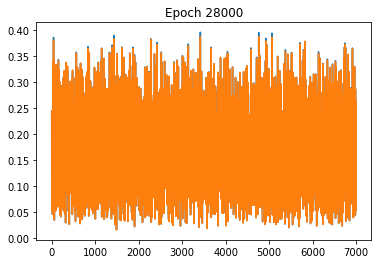

Training MSPE: 4.2537454e-06
Max validation percentage error: 0.0325821908886752


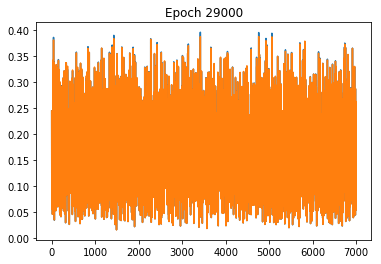

Training MSPE: 4.021872e-06
Max validation percentage error: 0.031473635736391614


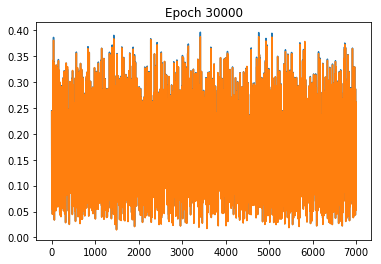

Training MSPE: 5.2495234e-05
Max validation percentage error: 0.04308621761584641


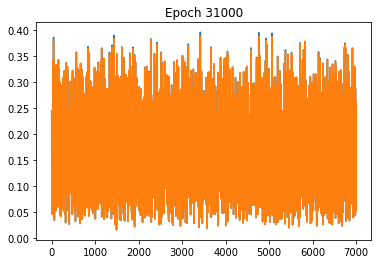

Training MSPE: 4.10338e-06
Max validation percentage error: 0.029249726734553505


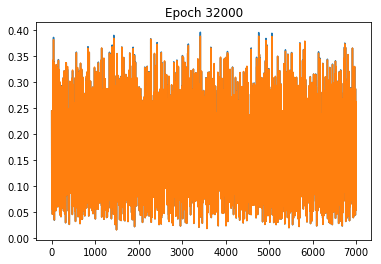

Training MSPE: 3.5725263e-06
Max validation percentage error: 0.02840154331288236


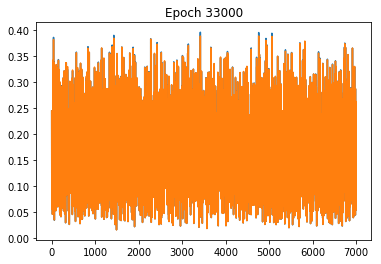

Training MSPE: 3.5472206e-06
Max validation percentage error: 0.027605820109341206


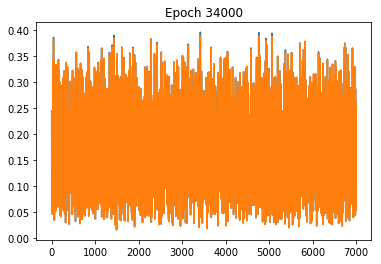

Training MSPE: 3.3278545e-06
Max validation percentage error: 0.026641231965480294


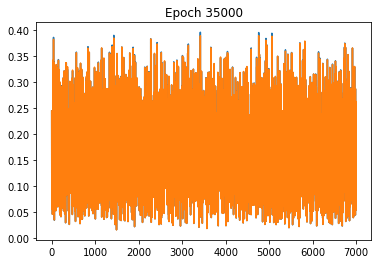

Training MSPE: 3.2113314e-06
Max validation percentage error: 0.025894018385708817


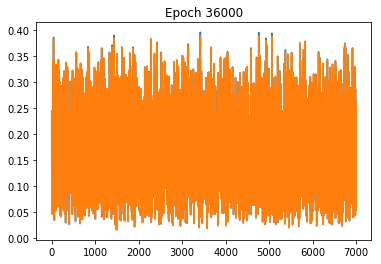

Training MSPE: 3.1915456e-06
Max validation percentage error: 0.025340475803866447


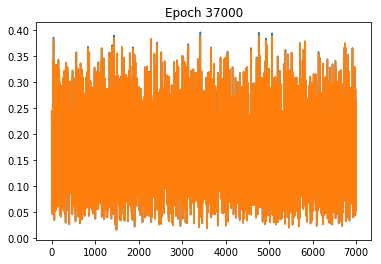

Training MSPE: 3.018612e-06
Max validation percentage error: 0.0244368921868674


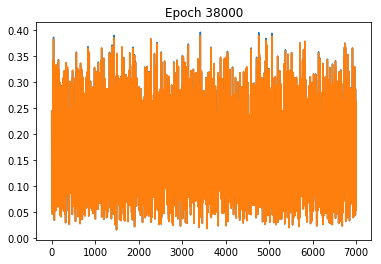

Training MSPE: 2.9393052e-06
Max validation percentage error: 0.023742046950938178


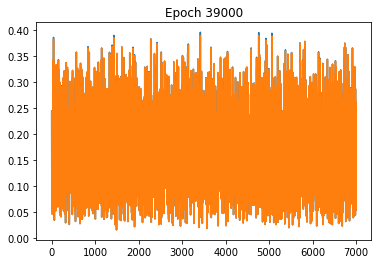

Training MSPE: 2.8760194e-06
Max validation percentage error: 0.023153408391292984


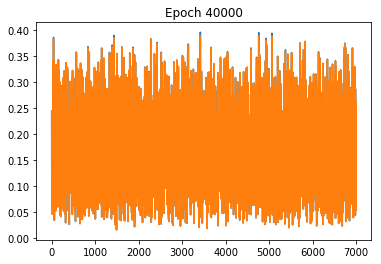

Training MSPE: 2.7792762e-06
Max validation percentage error: 0.022581399077674646


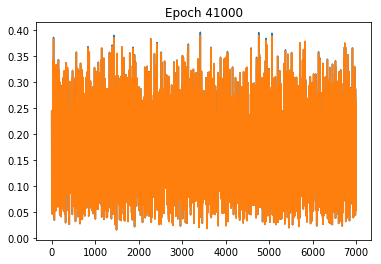

Training MSPE: 2.738852e-06
Max validation percentage error: 0.022092719742766942


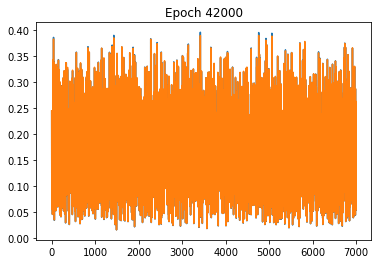

Training MSPE: 2.2074953e-05
Max validation percentage error: 0.02956827485609903


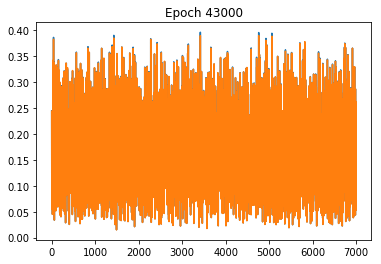

Training MSPE: 8.522851e-06
Max validation percentage error: 0.018748311931277684


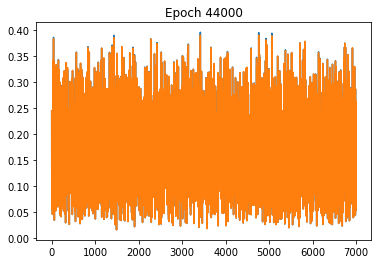

Training MSPE: 2.4912e-06
Max validation percentage error: 0.020515789473100288


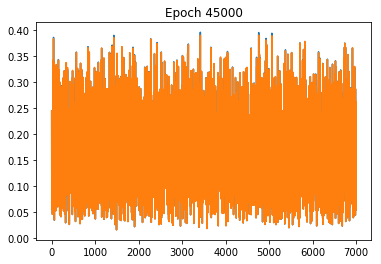

Training MSPE: 2.4424407e-06
Max validation percentage error: 0.020040156287009392


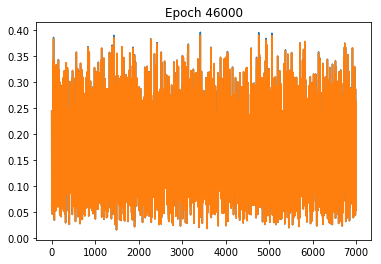

Training MSPE: 2.4706123e-06
Max validation percentage error: 0.019741289229958214


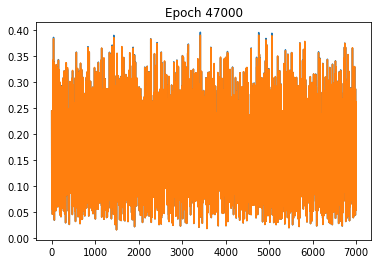

Training MSPE: 2.307503e-06
Max validation percentage error: 0.0191735061335625


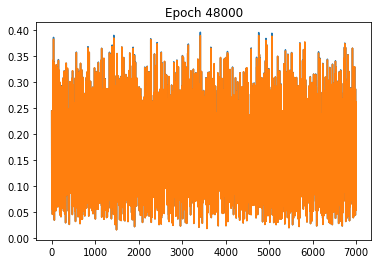

Training MSPE: 8.293984e-06
Max validation percentage error: 0.016528537272374466


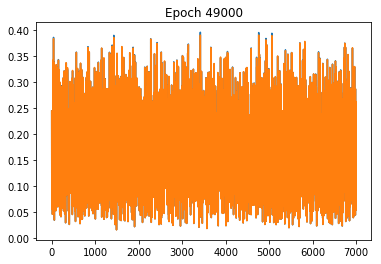

Training MSPE: 2.215692e-06
Max validation percentage error: 0.018322474608980732


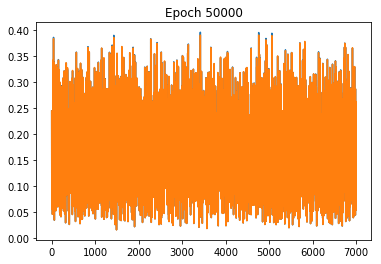

Training MSPE: 2.296403e-06
Max validation percentage error: 0.01799650463713398


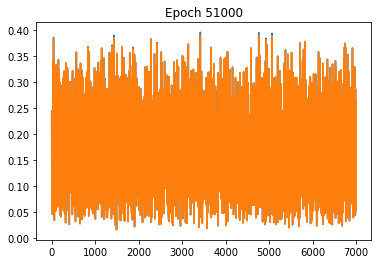

Training MSPE: 2.0842108e-06
Max validation percentage error: 0.017668329682388517


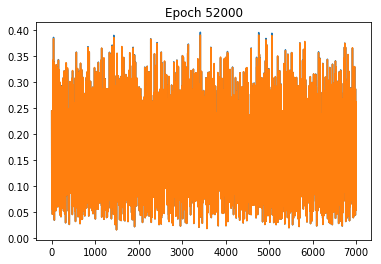

Training MSPE: 2.0337493e-06
Max validation percentage error: 0.017338868487619008


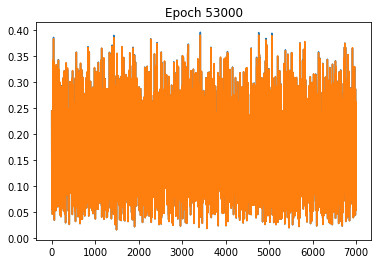

Training MSPE: 2.0153095e-06
Max validation percentage error: 0.017073994916921853


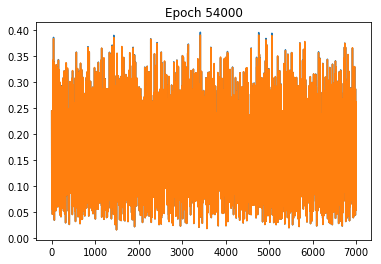

Training MSPE: 1.9692145e-06
Max validation percentage error: 0.016811326329122966


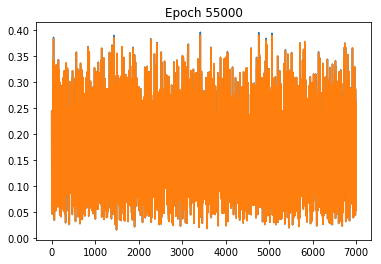

Training MSPE: 2.0083546e-06
Max validation percentage error: 0.01667443364083354


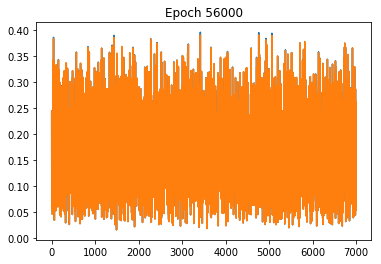

Training MSPE: 1.8488917e-06
Max validation percentage error: 0.01611896169895477


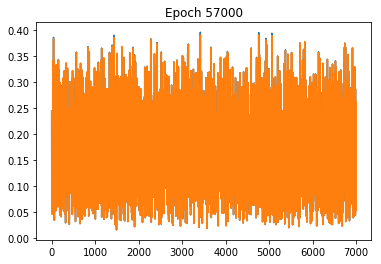

Training MSPE: 1.8095718e-06
Max validation percentage error: 0.01583093580782191


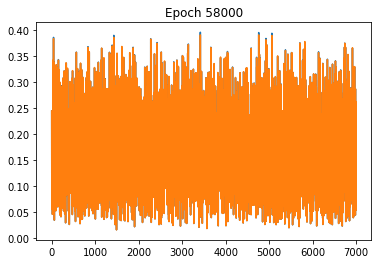

Training MSPE: 1.7717405e-06
Max validation percentage error: 0.015602995700676692


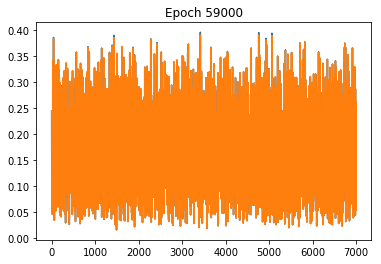

Training MSPE: 1.7283949e-06
Max validation percentage error: 0.015330312815546643


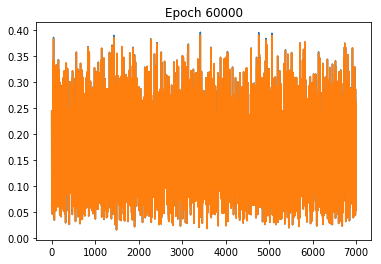

Training MSPE: 1.7203545e-06
Max validation percentage error: 0.015072789187844826


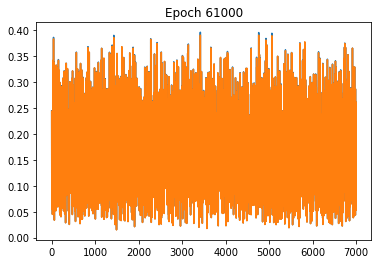

Training MSPE: 1.4918198e-05
Max validation percentage error: 0.02185778015340656


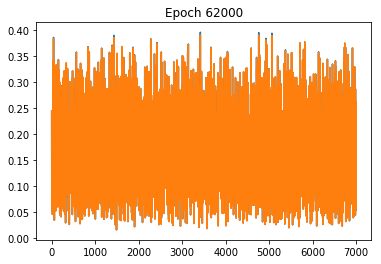

Training MSPE: 1.6588886e-06
Max validation percentage error: 0.014646492494110763


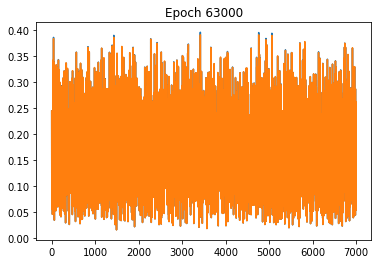

Training MSPE: 1.6003161e-06
Max validation percentage error: 0.014445471553186096


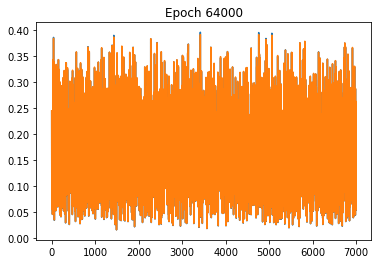

Training MSPE: 3.06445e-05
Max validation percentage error: 0.025507611747454195


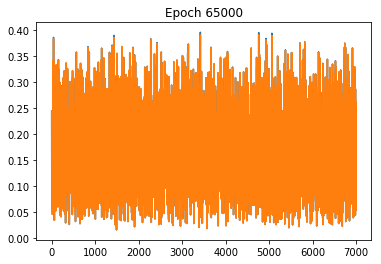

Training MSPE: 1.5206167e-06
Max validation percentage error: 0.01397369708716778


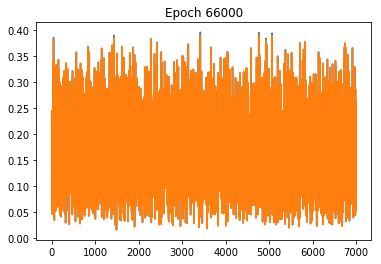

Training MSPE: 1.4905117e-06
Max validation percentage error: 0.013749340077232608


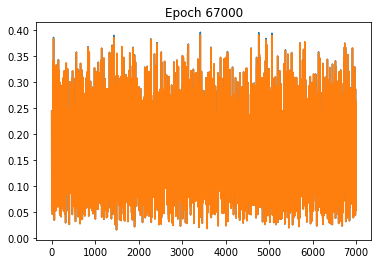

Training MSPE: 1.7189698e-06
Max validation percentage error: 0.013389652241894368


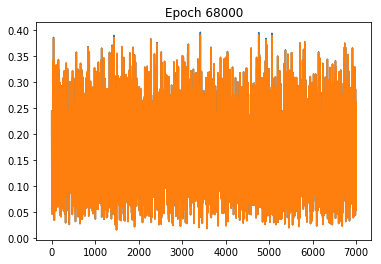

Training MSPE: 1.4366585e-06
Max validation percentage error: 0.01334840068683274


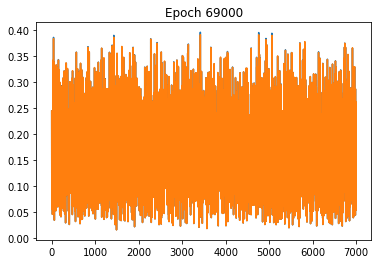

Training MSPE: 1.4111629e-06
Max validation percentage error: 0.013167959586295241


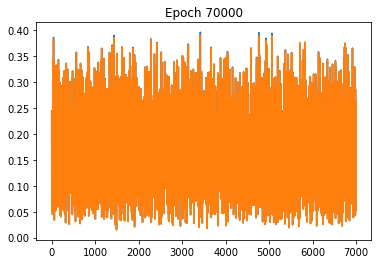

Training MSPE: 2.151506e-05
Max validation percentage error: 0.024194908704841978


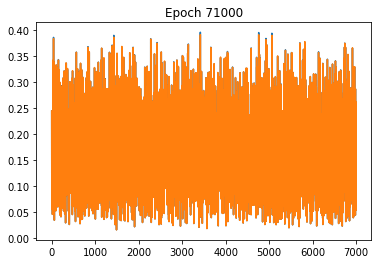

Training MSPE: 1.360119e-06
Max validation percentage error: 0.012792744996379168


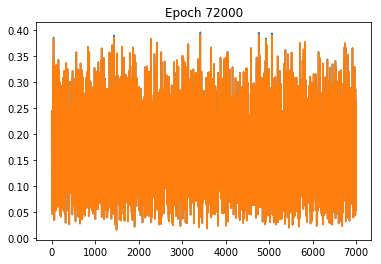

Training MSPE: 1.3354147e-06
Max validation percentage error: 0.012641152422098845


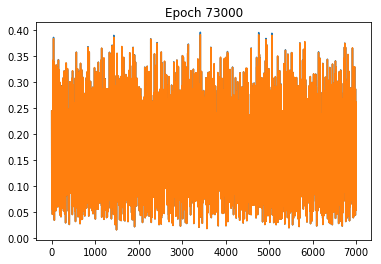

Training MSPE: 1.3131938e-06
Max validation percentage error: 0.012453728875715608


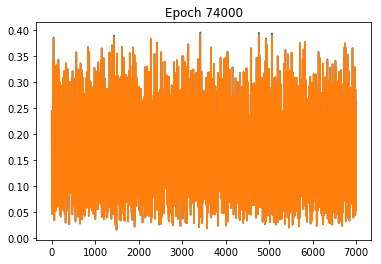

Training MSPE: 1.2910469e-06
Max validation percentage error: 0.012318489924600051


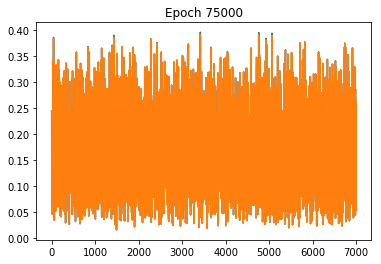

Training MSPE: 1.277703e-06
Max validation percentage error: 0.012170756070392086


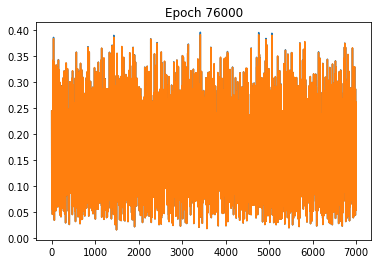

Training MSPE: 1.2537521e-06
Max validation percentage error: 0.012014753530314337


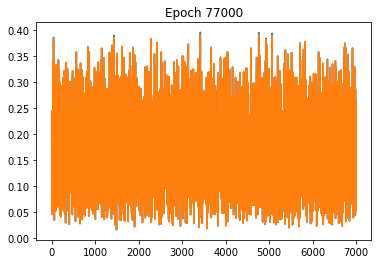

Training MSPE: 1.0741493e-05
Max validation percentage error: 0.01698749639333008


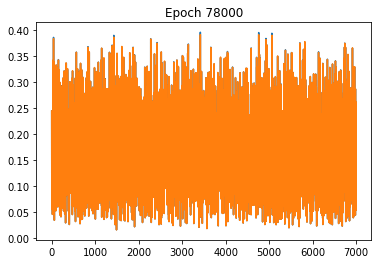

Training MSPE: 1.2150487e-06
Max validation percentage error: 0.011712670873202713


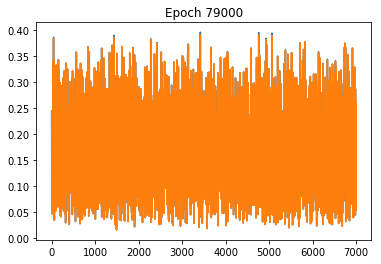

Training MSPE: 1.2019152e-06
Max validation percentage error: 0.011589099956592408


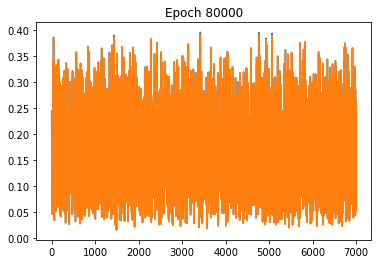

Training MSPE: 1.1746862e-06
Max validation percentage error: 0.011441549850959465


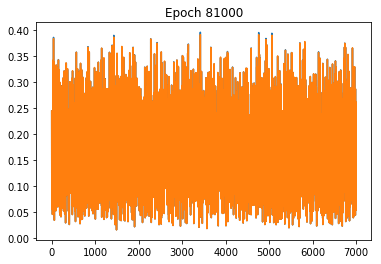

Training MSPE: 1.2112465e-06
Max validation percentage error: 0.011461945942771612


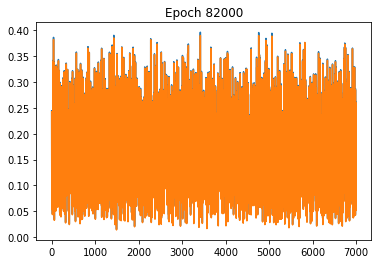

Training MSPE: 0.00020335967
Max validation percentage error: 0.07237729580838825


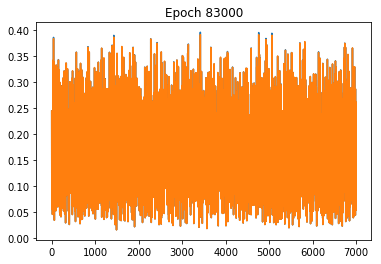

Training MSPE: 1.1216758e-06
Max validation percentage error: 0.011064314026719702


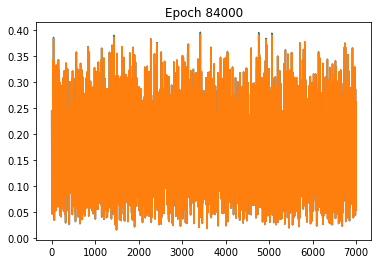

Training MSPE: 1.1093058e-06
Max validation percentage error: 0.010958934219022831


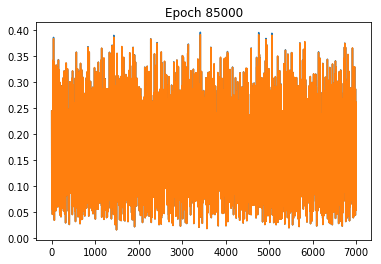

Training MSPE: 1.118626e-06
Max validation percentage error: 0.010831137085190123


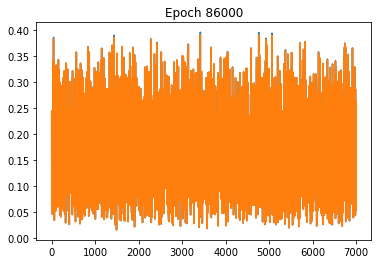

Training MSPE: 1.5133053e-06
Max validation percentage error: 0.011016815020111759


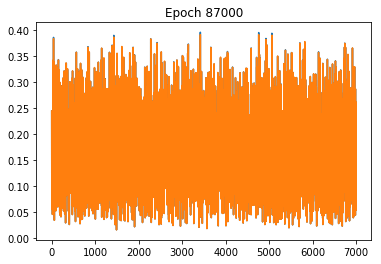

Training MSPE: 1.0546614e-06
Max validation percentage error: 0.010695438762637233


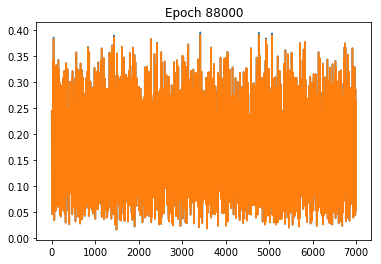

Training MSPE: 1.0484254e-06
Max validation percentage error: 0.010714916111575157


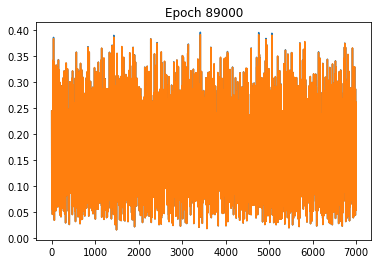

Training MSPE: 1.0305982e-06
Max validation percentage error: 0.010562221045845366


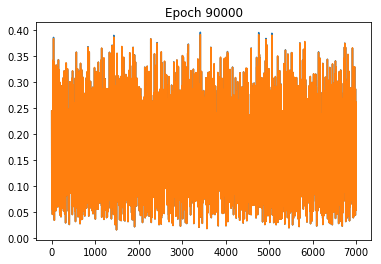

Training MSPE: 1.689726e-06
Max validation percentage error: 0.01088506729191896


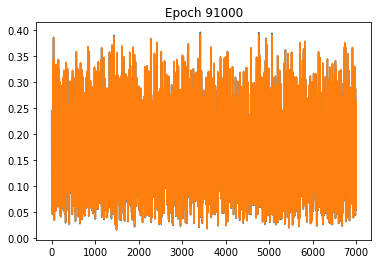

Training MSPE: 7.8319295e-05
Max validation percentage error: 0.0413434774300232


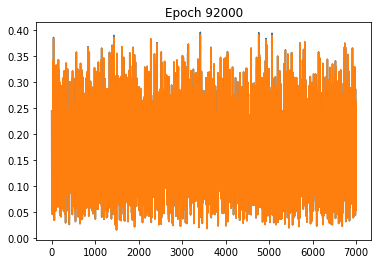

Training MSPE: 1.4512614e-06
Max validation percentage error: 0.010629840521403144
Final epochs: 92341
Training MSPE: 3.5371856e-06
Max validation percentage error: 0.009542692078093662


In [12]:
# Make Session
sess = tf.Session()

# Run initializer
sess.run(tf.global_variables_initializer())

# Number of epochs
e = 0

# Max validation percentage error
maxError = 999
tempError = 999
# Training mean square percentage error(MSPE)
mspe_final = 0

while (tempError<maxError or tempError>0.01):
    maxError = tempError
        
    # Run optimizer
    sess.run(opt, feed_dict={X: X_train, Y: y_train})

    # Predict for validation data
    pred = sess.run(out, feed_dict={X: X_valid})
    # Compute max validation percentage error
    error = []
    for i in range(y_valid.shape[0]):
        error.append(abs(pred[i][0]/y_valid[i][0]-1))
    tempError = max(error)

    e += 1
    
    # Show progress
    if np.mod(e, 1000) == 0:
        # Predict for training set
        pyplot.ion()
        fig = pyplot.figure()
        ax1 = fig.add_subplot(111)
        line1, = ax1.plot(y_train)
        pred = sess.run(out, feed_dict={X: X_train})
        line2, = ax1.plot(pred[:,0])
        pyplot.title('Epoch ' + str(e))
        file_name = 'img/epoch_' + str(e) + '.jpg'
        pyplot.savefig(file_name)
        pyplot.pause(0.01)
            
        # Print training MSPE and max percentage error of validation data after Training
        mspe_final = sess.run(mspe, feed_dict={X: X_train, Y: y_train})
        print("Training MSPE: "+str(mspe_final))
        print("Max validation percentage error: "+str(tempError))

# Print final training MSPE and max percentage error of validation data after Training
mspe_final = sess.run(mspe, feed_dict={X: X_train, Y: y_train})
print("Final epochs: "+str(e))
print("Training MSPE: "+str(mspe_final))
print("Max validation percentage error: "+str(tempError))

# Evaluation

## Predict for test data

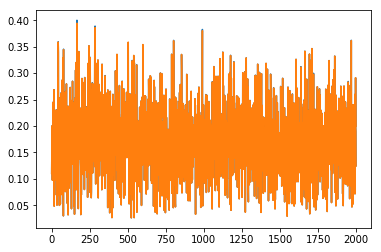

In [13]:
pyplot.ion()
fig = pyplot.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
pred = sess.run(out, feed_dict={X: X_test})
line2, = ax1.plot(pred[:,0])
pyplot.show()

## MSPE of test data

In [14]:
mspe_final = sess.run(mspe, feed_dict={X: X_test, Y: y_test})
print (mspe_final)

3.5019466e-06


## Max Percentage Error of test data 

In [15]:
error = []
for i in range(y_test.shape[0]):
    error.append(abs(pred[i][0]/y_test[i][0]-1))
max(error)

0.014011260695832806